In [1]:
import pandas as pd

# Load Train Dataset
train_df = pd.read_csv("./processed_data/preprocessed_train_data.csv")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketNum,TicketStr,FamilySize,Title
0,1,0,3,1,22.0,1,0,7.25,2,21171,1,1,5
1,2,1,1,0,38.0,1,0,71.28,0,17599,10,1,6
2,3,1,3,0,26.0,0,0,7.92,2,3101282,27,0,3
3,4,1,1,0,35.0,1,0,53.10,2,113803,9,1,6
4,5,0,3,1,35.0,0,0,8.05,2,373450,9,0,5


In [2]:
# Load Test Dataset
test_df = pd.read_csv("./processed_data/preprocessed_test_data.csv")
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketNum,TicketStr,FamilySize,Title
0,892,3,1,34.5,0,0,7.83,1,330911,10,0,4
1,893,3,0,47.0,1,0,7.00,2,363272,10,1,5
2,894,2,1,62.0,0,0,9.69,1,240276,10,0,4
3,895,3,1,27.0,0,0,8.66,2,315154,10,0,4
4,896,3,0,22.0,1,1,12.29,2,3101298,10,2,5


In [3]:
y = train_df['Survived']
X = train_df.iloc[:, train_df.columns != 'Survived']

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Best Hyperparameters: {'C': 0.1}
Training Accuracy: 0.8279266572637518
Testing Accuracy: 0.7359550561797753


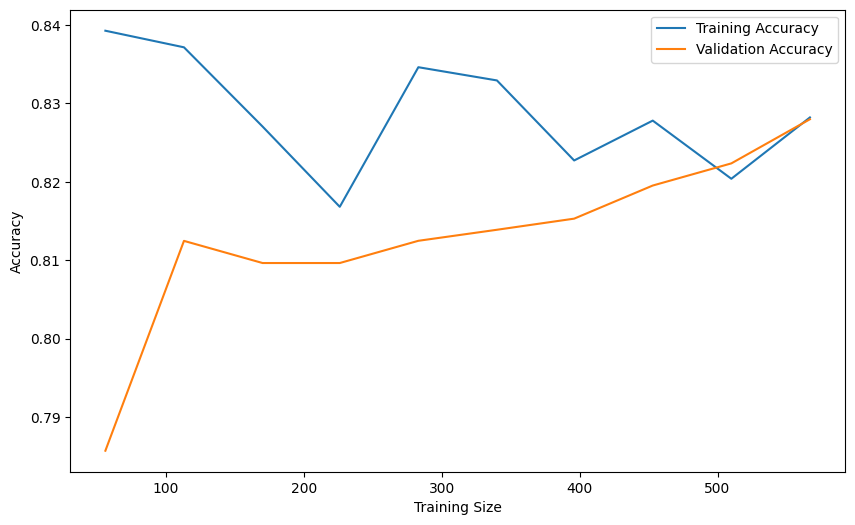

In [5]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Logistic Regression with tuned hyperparameters
logistic_model_tuned = LogisticRegression(max_iter=1000, C=best_params['C'])
logistic_model_tuned.fit(X_train_scaled, y_train)

# Cross-validation
logistic_predictions_train = logistic_model_tuned.predict(X_train_scaled)
logistic_accuracy_train = accuracy_score(y_train, logistic_predictions_train)
print("Training Accuracy:", logistic_accuracy_train)

logistic_predictions_test = logistic_model_tuned.predict(X_test_scaled)
logistic_accuracy_test = accuracy_score(y_test, logistic_predictions_test)
print("Testing Accuracy:", logistic_accuracy_test)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    logistic_model_tuned, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()